In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

c:\Users\danmf\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\danmf\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\danmf\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [2]:
DATASET_PATH = "C:/Users/danmf/OneDrive\Documents/asl_alphabet_train/asl_alphabet_train"

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\danmf\AppData\Local\Temp\ipykernel_17580\3567528026.py:1: SyntaxWarning: invalid escape sequence '\D'
  DATASET_PATH = "C:/Users/danmf/OneDrive\Documents/asl_alphabet_train/asl_alphabet_train"


In [3]:
IMAGE_SIZE = 64
CLASSES = sorted(os.listdir(DATASET_PATH))  # Assumes folders A-Z
NUM_CLASSES = len(CLASSES)
print(f"Detected classes: {CLASSES}")

Detected classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [5]:
data = []
labels = []
LIMIT_PER_CLASS = 1000  # Limit to 1000 images per class

for idx, label in enumerate(CLASSES):
    folder = os.path.join(DATASET_PATH, label)
    images = os.listdir(folder)[:LIMIT_PER_CLASS]
    for img_name in images:
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        data.append(img)
        labels.append(idx)

data = np.array(data, dtype='float32') / 255.0
labels = to_categorical(labels, NUM_CLASSES)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\danmf\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,893 (6.21 MB)

 Trainable params: 1,628,893 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.2287 - loss: 2.5669 - val_accuracy: 0.6328 - val_loss: 1.3863
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 34s 104ms/step - accuracy: 0.5539 - loss: 1.3188 - val_accuracy: 0.8168 - val_loss: 0.6665
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.6925 - loss: 0.8631 - val_accuracy: 0.8914 - val_loss: 0.4091
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 32s 97ms/step - accuracy: 0.7598 - loss: 0.6570 - val_accuracy: 0.9358 - val_loss: 0.2712
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8007 - loss: 0.5381 - val_accuracy: 0.9517 - val_loss: 0.1980
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.8304 - loss: 0.4578 - val_accuracy: 0.9621 - val_loss: 0.1452
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8631 - loss: 0.3768 - val_accuracy: 0.9664 - val_loss: 0.1173
Epoch 8/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 32s 97ms/step - accuracy: 0.8757 - loss: 0.3351

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9834 - loss: 0.0756
Test Accuracy: 98.34%


182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


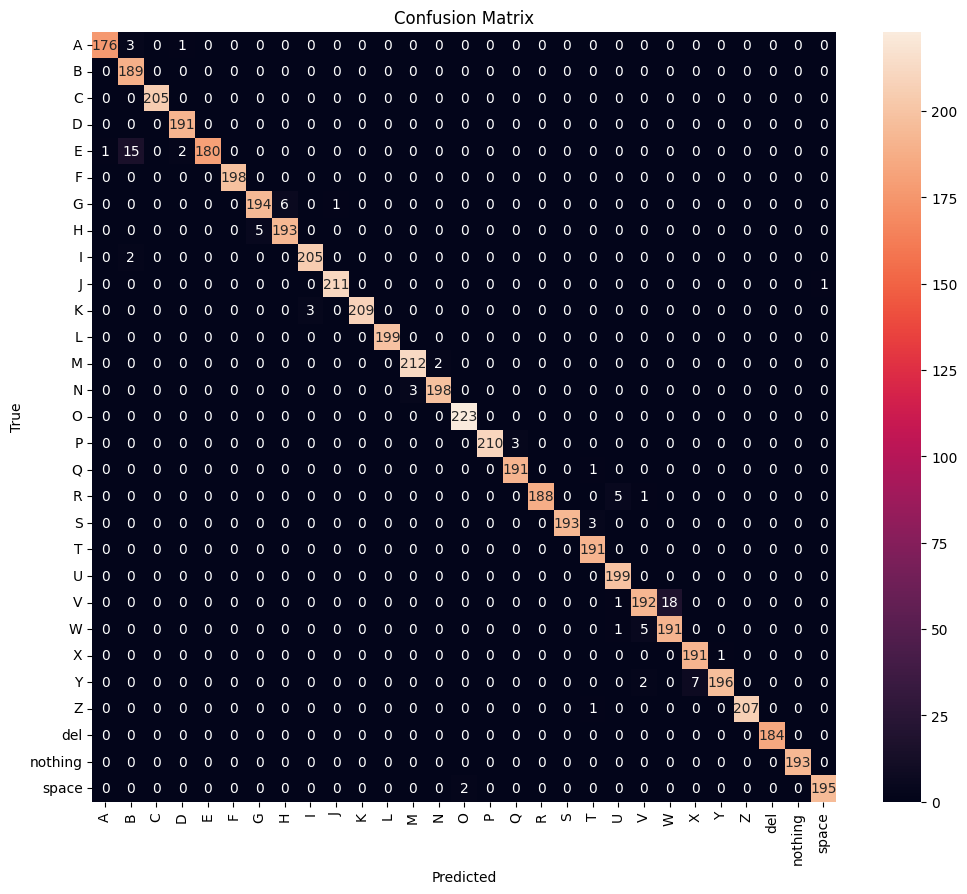

In [10]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, xticklabels=CLASSES, yticklabels=CLASSES, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [11]:
model.save("asl_model.h5")
print("Model saved as 'asl_model.h5'")

Model saved as 'asl_model.h5'


In [12]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("asl_model.tflite", "wb") as f:
    f.write(tflite_model)
print("Model converted to TFLite and saved as 'asl_model.tflite'")

INFO:tensorflow:Assets written to: C:\Users\danmf\AppData\Local\Temp\tmppvejwjj6\assets


INFO:tensorflow:Assets written to: C:\Users\danmf\AppData\Local\Temp\tmppvejwjj6\assets


Saved artifact at 'C:\Users\danmf\AppData\Local\Temp\tmppvejwjj6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  2039181826896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2039181827856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2039181828048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2039181828816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2039181827088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2039181829008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2039181827280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2039181829392: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model converted to TFLite and saved as 'asl_model.tflite'
